<a href="https://colab.research.google.com/github/JoshGreen0/CI-and-Biomed-Eng/blob/main/cs4001_allen_input_resistance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading and building cells from AllenDB

Useful links:
1. [Database](http://celltypes.brain-map.org/data)
2. [Downloading biophysical models](https://allensdk.readthedocs.io/en/latest/biophysical_models.html)
3. [Example on building cells](https://alleninstitute.github.io/AllenSDK/_static/examples/nb/pulse_stimulus.html)

In [1]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [2]:
!pip install --upgrade numpy
!pip install --upgrade pandas
!pip install --quiet allensdk neuron

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 49.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.3 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.3 which is incompatible.
pytensor 2.27.1 requires numpy<2,>=1.17.0, but you have numpy 2.2.3 which is incompatible.
langchain 0.3.19 requires numpy<2,>=1.26.4; python_version < "3.12", but you have numpy 2.2.3 which is incompatible.
thinc 8.2.5 requires numpy<2.0.0,>=1.19.0; python_version >= "3.9", but you have numpy 2.2.3 which is incompatible.
numba 0.61.0 requires numpy<2.2,>=1.24, but you have numpy 2.2.3 which is incompatib

In [3]:
!pip show allensdk

Name: allensdk
Version: 2.16.2
Summary: core libraries for the allensdk.
Home-page: https://github.com/AllenInstitute/AllenSDK/tree/v2.16.2
Author: Allen Institute for Brain Science
Author-email: instituteci@alleninstitute.org
License: 
Location: /usr/local/lib/python3.11/dist-packages
Requires: aiohttp, argschema, boto3, cachetools, future, glymur, h5py, hdmf, jinja2, matplotlib, ndx-events, nest-asyncio, numpy, pandas, psycopg2-binary, pynrrd, pynwb, python-dateutil, requests, requests-toolbelt, scikit-build, scikit-image, scipy, seaborn, semver, simpleitk, simplejson, six, sqlalchemy, statsmodels, tables, tqdm, xarray
Required-by: 


In [4]:
!pip show neuron

Name: NEURON
Version: 8.2.6
Summary: Empirically-based simulator for modeling neurons and networks of neurons
Home-page: https://neuron.yale.edu/neuron/
Author: Michael Hines, Yale, Blue Brain Project
Author-email: michael.hines@yale.edu
License: Copyright (c) Michael Hines (BSD compatible)
Location: /usr/local/lib/python3.11/dist-packages
Requires: find-libpython, numpy, packaging, setuptools
Required-by: 


In [5]:
!pip show numpy

Name: numpy
Version: 1.23.5
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD
Location: /usr/local/lib/python3.11/dist-packages
Requires: 
Required-by: accelerate, albucore, albumentations, ale-py, allensdk, argschema, arviz, astropy, autograd, bigframes, blis, blosc2, bokeh, Bottleneck, bqplot, chex, clarabel, cmdstanpy, contourpy, cudf-cu12, cufflinks, cupy-cuda12x, cvxpy, cyipopt, datascience, db-dtypes, diffusers, dm-tree, dopamine_rl, flax, folium, geemap, gensim, geopandas, Glymur, gym, gymnasium, h5py, hdmf, highspy, holoviews, hyperopt, ibis-framework, imageio, imbalanced-learn, imgaug, jax, jaxlib, keras, keras-hub, langchain, librosa, lightgbm, matplotlib, matplotlib-venn, missingno, mizani, ml-dtypes, mlxtend, moviepy, music21, NEURON, nibabel, numba, numexpr, nx-cugraph-cu12, opencv-contrib-python, opencv-python, opencv-python-headless, optax, orbax-checkp

In [6]:
!pip show pandas

Name: pandas
Version: 1.5.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy, python-dateutil, pytz
Required-by: allensdk, arviz, bigframes, bigquery-magics, bokeh, bqplot, cmdstanpy, cudf-cu12, cufflinks, datascience, db-dtypes, dopamine_rl, fastai, geemap, geopandas, google-colab, gspread-dataframe, hdmf, holoviews, ibis-framework, mizani, mlxtend, pandas-datareader, pandas-gbq, panel, plotnine, prophet, pymc, pynwb, seaborn, shap, sklearn-pandas, statsmodels, vega-datasets, xarray, yfinance


In [22]:
from allensdk.api.queries.biophysical_api import BiophysicalApi
from allensdk.model.biophys_sim.config import Config
from allensdk.model.biophysical.utils import Utils

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import os
from neuron import h

## Download the cell

In [8]:
# Mouse Layer 5 Primary visual area neuron
# http://celltypes.brain-map.org/experiment/electrophysiology/488683425
# http://celltypes.brain-map.org/experiment/electrophysiology/486132712
# http://celltypes.brain-map.org/experiment/electrophysiology/487099387

specimen_id = 487099387 # Specimen_id

In [9]:
bp = BiophysicalApi()
specimen_list = bp.get_neuronal_models(specimen_id) # Adding specimen to a variable
print("Number of neurons connected:", len(specimen_list)) # Number of neurons linked to this specimen
print(specimen_list)

Number of neurons connected: 2
[{'id': 488083972, 'name': 'Biophysical - perisomatic_Rbp4-Cre_KL100;Ai14-205727.02.02.01', 'neuron_reconstruction_id': 512328534, 'neuronal_model_template_id': 329230710, 'specimen_id': 486132712}, {'id': 515175260, 'name': 'Biophysical - all active_Rbp4-Cre_KL100;Ai14-205727.02.02.01', 'neuron_reconstruction_id': 512328534, 'neuronal_model_template_id': 491455321, 'specimen_id': 486132712}]


In [10]:
# Convert all numpy arrays in dictionary values to lists (or scalars)
def clean_dict(d):
    return {k: (v.tolist() if isinstance(v, np.ndarray) else v) for k, v in d.items()}

# Apply cleaning function to all dictionary elements in the list
cleaned_specimen_list = [clean_dict(item) for item in specimen_list]

# Convert the cleaned list into a Pandas DataFrame
specimen_df = pd.DataFrame(cleaned_specimen_list)

In [12]:
specimen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2 non-null      int64 
 1   name                        2 non-null      object
 2   neuron_reconstruction_id    2 non-null      int64 
 3   neuronal_model_template_id  2 non-null      int64 
 4   specimen_id                 2 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 212.0+ bytes


In [13]:
specimen_df.id[0]

488083972

In [14]:
# Download the cell with passive dendrites
bp.cache_stimulus = False # Change to False to not download the large stimulus NWB file
bp.cache_data(specimen_df.id[0]) # specimen neuron 'id'

2025-02-25 22:29:30,191 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/512328536
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/512328536
2025-02-25 22:29:30,617 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/512328544
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/512328544
2025-02-25 22:29:30,810 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/395337293
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/395337293
2025-02-25 22:29:30,911 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_fi

# **Editing the Json file**

In [15]:
# ID of the fit.json file
search_number = str(specimen_df.id[0])

# Find files in the directory
found_file = os.popen(f"ls | grep {search_number}").read().strip()

if found_file:
    print("Found file:", found_file)
else:
    print("No matching file found.")

id_file = found_file
# Former input: "/content/fit_486132712_f9.json" # str(specimen_df.id[0]) + "_fit.json"

# Load JSON file
with open(id_file, "r") as file:
    data = json.load(file)

# Function to recursively find and convert "value" fields
def convert_value_fields(obj):
    if isinstance(obj, dict):  # If it's a dictionary, process each key-value pair
        for key, value in obj.items():
            if key == "value" and isinstance(value, str):  # Check if key is "value" and is a string
                try:
                    obj[key] = float(value)  # Convert to float
                except ValueError:
                    pass  # Ignore if conversion fails
            else:
                obj[key] = convert_value_fields(value)  # Recurse into nested structures
    elif isinstance(obj, list):  # If it's a list, process each element
        obj = [convert_value_fields(item) for item in obj]
    return obj  # Return modified object

# Convert "value" key in JSON
updated_data = convert_value_fields(data)

# Save back to _fit.json
with open(id_file, "w") as file:
    json.dump(updated_data, file, indent=4)

print("Successfully converted all 'value' fields to float in _fit.json!")


Successfully converted all 'value' fields to float in _fit.json!


## Build the cell

**Important:** open the _fit.json file and change any "value" numbers from str to int (e.g, "1" -> 1).

In [16]:
# Compile the modfiles
!nrnivmodl modfiles

# Create the h object
description = Config().load('manifest.json')
utils = Utils(description)
h = utils.h

/usr/local/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
/content
Mod files: "modfiles/modfiles/CaDynamics.mod" "modfiles/modfiles/Ca_HVA.mod" "modfiles/modfiles/Ca_LVA.mod" "modfiles/modfiles/Ih.mod" "modfiles/modfiles/Im.mod" "modfiles/modfiles/Im_v2.mod" "modfiles/modfiles/Kd.mod" "modfiles/modfiles/K_P.mod" "modfiles/modfiles/K_T.mod" "modfiles/modfiles/Kv2like.mod" "modfiles/modfiles/Kv3_1.mod" "modfiles/modfiles/Nap.mod" "modfiles/modfiles/NaTa.mod" "modfiles/modfiles/NaTs.mod" "modfiles/modfiles/NaV.mod" "modfiles/modfiles/SK.mod"

Creating 'x86_64' directory for .o files.

 -> NMODL ../modfiles/Ca_HVA.mod
 -> NMODL ../modfiles/Ca_LVA.mod
 -> NMODL ../modfiles/CaDynamics.mod
 -> Compiling mod_func.cpp
Translating Ca_LVA.mod into /content/x86_64/Ca_LVA.c
Thread Safe
Translating CaDynamics.mod into /content/x86_64/CaDynamics.c
Translating Ca_HVA.mod in

In [17]:
# Configure morphology
manifest = description.manifest
morphology_path = description.manifest.get_path('MORPHOLOGY')
utils.generate_morphology(morphology_path.encode('ascii', 'ignore'))

# Specify passive properties
passive = {
      "ra": 100,
      "cm": [
        {
          "section": "soma",
          "cm": 1
        },
        {
          "section": "axon",
          "cm": 1
        },
        {
          "section": "dend",
          "cm": 1
        },
        {
          "section": "apic",
          "cm": 1
        }
      ],
      "e_pas": -65.75
}
utils.description.data["passive"][0] = passive
utils.load_cell_parameters()

In [41]:
# Set current injection
stim = h.IClamp(h.soma[0](0.5))
stim.amp = -2 # 1.0
stim.delay = 100.0 # 100.0
stim.dur = 800.0 # 800.0
h.tstop = 1000.0 # 1000.0

In [42]:
vec = utils.record_values()

In [43]:
h.finitialize()
h.run()

0.0

In [32]:
vec.values()

dict_values([Vector[2], Vector[3]])

# Finding the Input Resistance

In [45]:
vec['v'].as_numpy()

array([-82.34514618, -82.16549165, -82.02923477, ..., -68.57841793,
       -68.57882134, -68.57922472])

In [46]:
vec['t'].as_numpy()

array([0.00000e+00, 2.50000e-02, 5.00000e-02, ..., 9.99950e+02,
       9.99975e+02, 1.00000e+03])

In [54]:
# Convert recorded data to numpy arrays
time = vec['t'].as_numpy()
voltage = vec['v'].as_numpy()

# Defining injection periods (ms)
injection_start = stim.delay
injection_end = stim.delay + stim.dur

before_inject = time < injection_start
during_inject = (time >= (injection_end - injection_start)) & (time <= injection_end) #  Steady-state near the end

# Find resting and steady-state voltages
r_voltage = np.mean(voltage[before_inject])  # Avg Before injection
ss_voltage = np.mean(voltage[during_inject]) # Avg near end of injection

# Defining current injection
injected_current = stim.amp

# Compute Input Resistance (Ohm = mV/nA)
R_in = (ss_voltage - r_voltage) / injected_current  # Resistance in MΩ

print(f"Resting Membrane Potential: {r_voltage:.2f} mV")
print(f"Steady-State Voltage: {ss_voltage:.2f} mV")
print(f"Input Resistance (Rin): {R_in:.2f} MΩ")

Resting Membrane Potential: -68.34 mV
Steady-State Voltage: -282.73 mV
Input Resistance (Rin): 107.20 MΩ


Text(0, 0.5, 'Voltage (mV)')

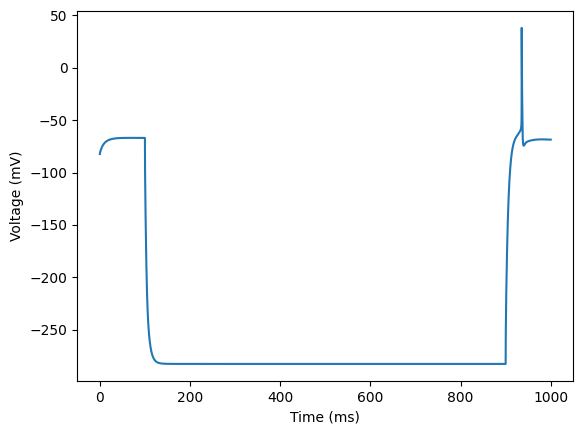

In [49]:
plt.plot(vec['t'].as_numpy(), vec['v'].as_numpy())
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (mV)")